In [46]:
import pandas as pd

df = pd.read_csv('census-income.data.gz', compression='gzip',  header=None)
df.columns = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY',
                    'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN',
                    'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS',
                    'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL',
                    'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN',
                    'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP',
                    'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK', 'YEAR',
                    'target']
print(df.head(10))

   AAGE                          ACLSWKR  ADTIND  ADTOCC  \
0    73                  Not in universe       0       0   
1    58   Self-employed-not incorporated       4      34   
2    18                  Not in universe       0       0   
3     9                  Not in universe       0       0   
4    10                  Not in universe       0       0   
5    48                          Private      40      10   
6    42                          Private      34       3   
7    28                          Private       4      40   
8    47                 Local government      43      26   
9    34                          Private       4      37   

                          AHGA  AHRSPAY            AHSCOL  \
0         High school graduate        0   Not in universe   
1   Some college but no degree        0   Not in universe   
2                   10th grade        0       High school   
3                     Children        0   Not in universe   
4                     Children    

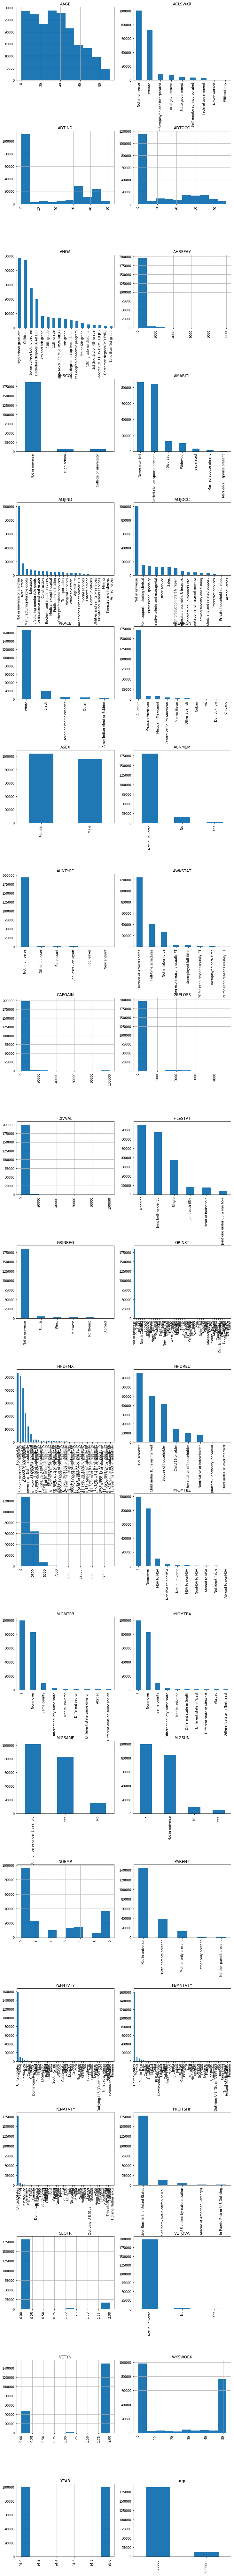

In [47]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,147))
cols = 2
rows = np.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [48]:
#print(df.isnull())
df.dropna(how='all', inplace = True)
print(len(df))

199523


In [49]:
from sklearn.preprocessing import StandardScaler
numerical_col = ["AAGE", "AHRSPAY", "CAPGAIN", "CAPLOSS",
                     "DIVVAL", "MARSUPWT", "NOEMP", "VETYN", "WKSWORK"]

scaler = StandardScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])

In [50]:
df = df.drop("SEOTR", axis=1)
#df= df.replace(['- 50000', '50000+'], [0, 1])
#df_ohe = pd.get_dummies(df)
print(df.head(5))

       AAGE                          ACLSWKR  ADTIND  ADTOCC  \
0  1.725879                  Not in universe       0       0   
1  1.053560   Self-employed-not incorporated       4      34   
2 -0.739291                  Not in universe       0       0   
3 -1.142682                  Not in universe       0       0   
4 -1.097861                  Not in universe       0       0   

                          AHGA   AHRSPAY            AHSCOL         AMARITL  \
0         High school graduate -0.201629   Not in universe         Widowed   
1   Some college but no degree -0.201629   Not in universe        Divorced   
2                   10th grade -0.201629       High school   Never married   
3                     Children -0.201629   Not in universe   Never married   
4                     Children -0.201629   Not in universe   Never married   

                         AMJIND                                AMJOCC  \
0   Not in universe or children                       Not in universe   


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["target"] = le.fit_transform(df["target"])
print(df.head(5))

       AAGE                          ACLSWKR  ADTIND  ADTOCC  \
0  1.725879                  Not in universe       0       0   
1  1.053560   Self-employed-not incorporated       4      34   
2 -0.739291                  Not in universe       0       0   
3 -1.142682                  Not in universe       0       0   
4 -1.097861                  Not in universe       0       0   

                          AHGA   AHRSPAY            AHSCOL         AMARITL  \
0         High school graduate -0.201629   Not in universe         Widowed   
1   Some college but no degree -0.201629   Not in universe        Divorced   
2                   10th grade -0.201629       High school   Never married   
3                     Children -0.201629   Not in universe   Never married   
4                     Children -0.201629   Not in universe   Never married   

                         AMJIND                                AMJOCC  ...    \
0   Not in universe or children                       Not in unive

In [52]:
df_ohe = pd.get_dummies(df)
print(df_ohe.head(5))

       AAGE  ADTIND  ADTOCC   AHRSPAY   CAPGAIN   CAPLOSS    DIVVAL  MARSUPWT  \
0  1.725879       0       0 -0.201629 -0.092542 -0.137236 -0.099553 -0.040543   
1  1.053560       4      34 -0.201629 -0.092542 -0.137236 -0.099553 -0.691139   
2 -0.739291       0       0 -0.201629 -0.092542 -0.137236 -0.099553 -0.753126   
3 -1.142682       0       0 -0.201629 -0.092542 -0.137236 -0.099553  0.017871   
4 -1.097861       0       0 -0.201629 -0.092542 -0.137236 -0.099553 -0.675431   

      NOEMP     VETYN     ...       PENATVTY_ Vietnam  PENATVTY_ Yugoslavia  \
0 -0.827096  0.569799     ...                       0                     0   
1 -0.404284  0.569799     ...                       0                     0   
2 -0.827096  0.569799     ...                       1                     0   
3 -0.827096 -1.779077     ...                       0                     0   
4 -0.827096 -1.779077     ...                       0                     0   

   PRCITSHP_ Foreign born- Not a citiz

In [26]:
from sklearn.model_selection import train_test_split

X = df_ohe.drop(['target'], 1)
y = df_ohe['target']


#Splitting data as train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [20],
    #'max_features': ['auto', 'sqrt', 'log2']
    'max_features': ['sqrt', 'log2']
}
rfc = RandomForestClassifier(n_jobs=-1)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(rfc, param_grid, cv=7)
grid_result = grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_features': 'sqrt', 'n_estimators': 20}


In [36]:
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve

y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print(auc)

0.670796133224


In [54]:
from sklearn.linear_model import LogisticRegression

param_grid = { 
    'C': [0.1, 10, 1],
    'solver': ['newton-cg'],
    'class_weight' : ['balanced']
}

clf = LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=10)
gs = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=7)
grid_search.fit(X_train, y_train)
y_pred2 = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred2)
print(acc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
print(fpr)
auc3 = auc(fpr, tpr)
print(auc)

0.951033705049
[ 0.          0.00843057  1.        ]
<function auc at 0x1130f5ae8>


In [55]:
print(auc3)

0.673273890047
